<a href="https://colab.research.google.com/github/tanyakamal14/Zomato_Stock_Prediction/blob/main/Zomato_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Stock Price Prediction
This notebook demonstrates how to build a stock price prediction model using historical data from Zomato.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/zomato.csv")

# Display basic information
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


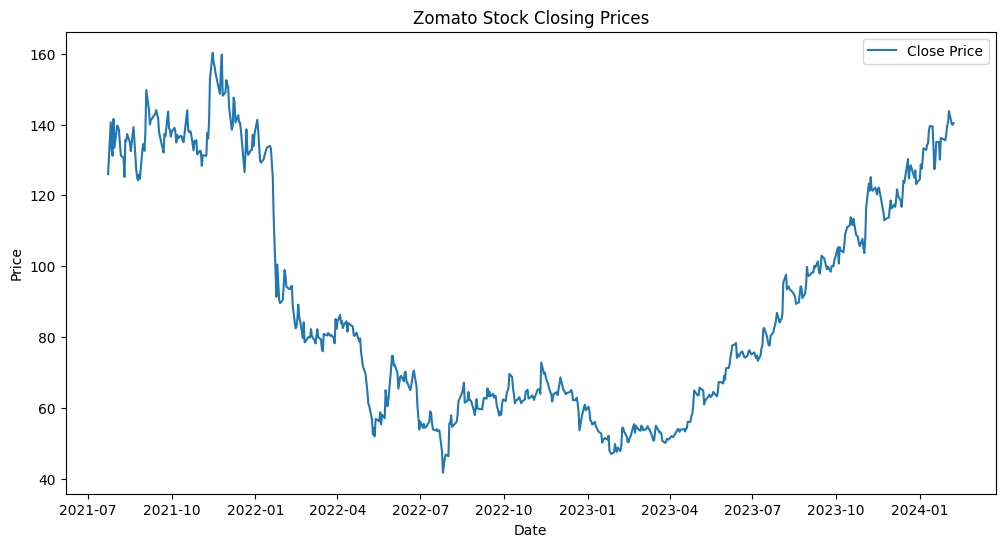

In [4]:
# Visualize closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Zomato Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
# Use previous days to predict the next day's close
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features and labels
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 7.92


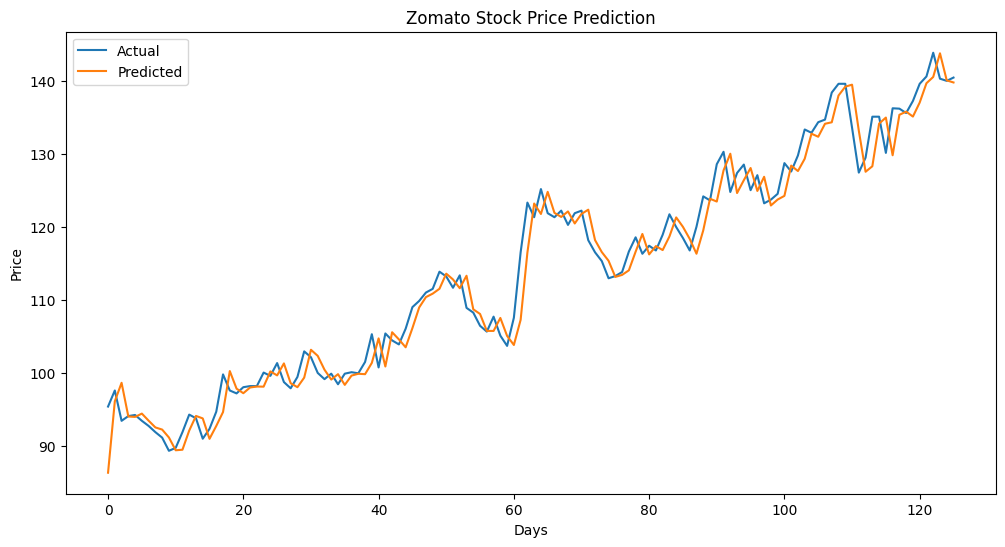

In [6]:
# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Zomato Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()